In [1]:
import pandas as pd

In [2]:
import statsmodels.api as sm

In [3]:
import numpy as np

In [4]:
from sklearn import linear_model

In [5]:
from matplotlib import pyplot as plt

In [6]:
d = pd.read_excel("dataFromCarl.xlsx",sheet_name = 'Sheet2')

In [7]:
from scipy.stats import ttest_ind

In [8]:
import matplotlib.cm as cm #latex module

In [9]:
d

,mailingQty,orders,marketingCosts
0,249500,8401,162501.19
1,102887,3514,0.00
2,881,71,0.00
3,110136,5114,0.00
4,67489,2506,0.00
...,...,...,...
85,250000,8923,67850.00
86,60000,1394,21000.00
87,140000,6278,49000.00
88,229672,8280,80385.20


In [10]:
x = d.drop(["orders","marketingCosts"], axis=1)

In [11]:
y = d.drop(["mailingQty","marketingCosts"], axis=1)

In [12]:
d.describe()

,mailingQty,orders,marketingCosts
count,90.000000,90.000000,90.000000
mean,80554.811111,3144.600000,25274.678770
std,77325.020775,2992.850889,30107.264507
min,0.000000,1.000000,0.000000
25%,2445.500000,350.500000,1394.325000
50%,57588.000000,2166.500000,12760.127200
75%,143750.000000,5596.500000,48400.458300
max,250000.000000,9816.000000,162501.190000


In [13]:
regr = linear_model.LinearRegression()

In [14]:
regr.fit(x,y)

LinearRegression()

In [15]:
Y_pred = regr.predict(x)

Text(0.5, 1.0, 'Linear Regression of Mailing Quantity vs Orders')

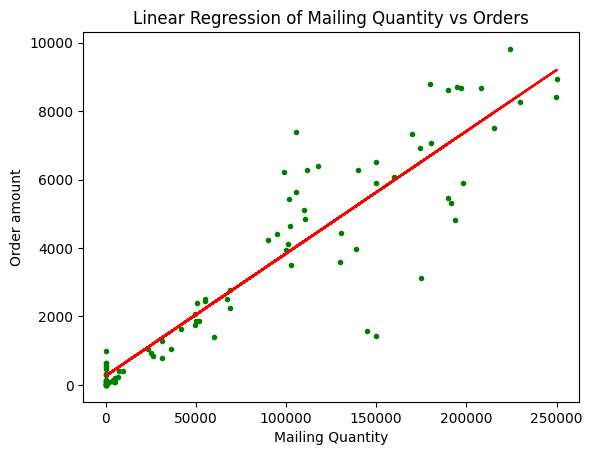

In [16]:
plt.scatter(x, y, color = 'green', marker = '.')
plt.plot(x, Y_pred, color='red')
plt.xlabel("Mailing Quantity")
plt.ylabel("Order amount")
plt.title("Linear Regression of Mailing Quantity vs Orders")

In [17]:
d.mean()

mailingQty        80554.811111
orders             3144.600000
marketingCosts    25274.678770
dtype: float64

In [18]:
#coefficient of determination
r_sq = regr.score(x,y)
r_sq

0.85318447280849

the $R^2$ value determines how much of the dependant varibale is explained by the shape of the independant. The value given of 0.853 means that 85.3% of the data can be explained by this regression model which is very good. 0.7 < means a high level of correlation and 0.4 > shows little correlation between the variables.

In [19]:
res = ttest_ind(x,y).pvalue
res

array([1.52245875e-17])

T-tests determine how much of the data represents the null hypothesis, i.e. The percentage of data that demonstrate that the variables aren't related. This value is much smaller than 0.05 (5%) meaning that the null hypothesis is not true.



$\textbf{Looking into Multivariable Linear Regression}$

For this test, there will be two independant variables and one dependant. This study will determine how the mailing quantity and the marketing costs will affect the total orders.

First the x varialbe must be overwritten to become a n x 2 array

In [20]:
x = d[["mailingQty", "marketingCosts"]]

In [21]:
y = d[["orders"]]

In [22]:
regr = linear_model.LinearRegression()

In [23]:
regr.fit(x,y)

LinearRegression()

In [24]:
print("Intecept: \n", regr.intercept_)

Intecept: 
 [267.30953125]


In [25]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[0.03532648 0.00124918]]


In [26]:
x = sm.add_constant(x) # adding a constant

In [27]:
model = sm.OLS(y, x).fit()

In [28]:
predictions = model.predict(x) 

In [29]:
print_model = model.summary()

In [30]:
print(model.params)

const             267.309531
mailingQty          0.035326
marketingCosts      0.001249
dtype: float64


These values are the coefficients of the regression model; The amount that orders increases with every unit increase in mailing qunatity or marketing price.

In [31]:
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     252.9
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           5.62e-37
Time:                        07:45:21   Log-Likelihood:                -761.21
No. Observations:                  90   AIC:                             1528.
Df Residuals:                      87   BIC:                             1536.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            267.3095    177.904      1.

$\textbf{Table Summary}$

The $R^2$ Value shows that 85.3% of the dependant variable's variation is explained by the independant variables.



Text(0, 0.5, 'Order number')

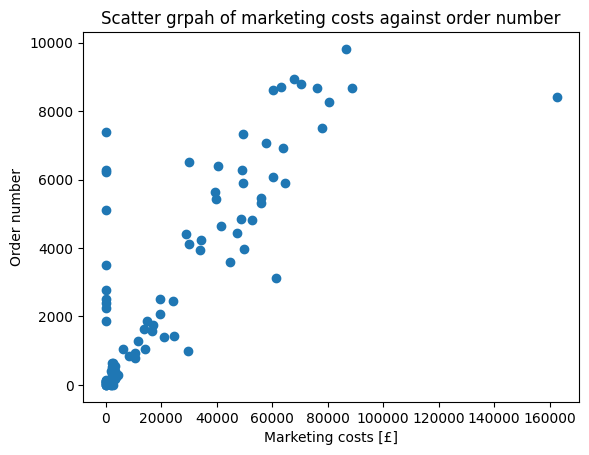

In [32]:
plt.scatter(d["marketingCosts"], d["orders"])
plt.title("Scatter grpah of marketing costs against order number")
plt.xlabel("Marketing costs [£]")
plt.ylabel("Order number")

$\textbf{Expalination of the t-test}$

The best way to explain the f-test is with the below diagram

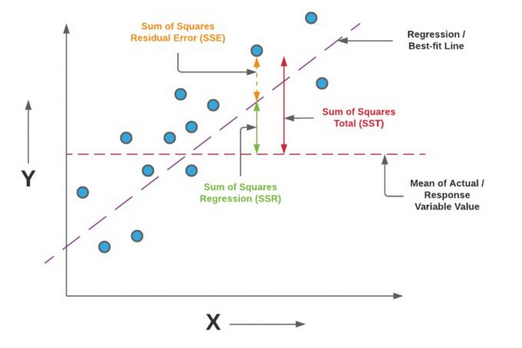

$\textbf{The F-Statistic}$

The f test of a regression model determines the significance of the trend. It tests the null hpothesis; which states that the model with no independant variabes fits the data as well as the model. The F-Statistic 


f-tests test determines the significance of all the coefficients wheras the t-test determines the significance of the coefficients individually. It is useful to use a t-test as well to see the effect of the independant variables seperately on the dependant.
